## Import package + Téléchargement CIF

In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.symmetry.analyzer import *
from pymatgen.io.cif import *
from pymatgen.core.operations import *
from tabulate import tabulate
from pymatgen.symmetry.site_symmetries import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pymatgen.analysis.diffraction.xrd import XRDCalculator

In [2]:
#Création du fichier CIF symmetrized 
with MPRester("2zPo57HHJnOTqpLHp5c") as m: 
        structure = m.get_structure_by_material_id("mp-1434")
        w=CifWriter(structure,symprec=0.1)
        w.write_file("MoS2_symmetrized.cif")

Pour rappel, un cristal est un ensemble de plans. Ces derniers sont séparés par une distance $d_{hkl}$ qui correspond à la distance inter-planaire pour la famille de plans (hkl).

Ce notebook aura pour but l'étude du rayonnement X incident Cu Kα de longueur d’onde λ=1.54060 Å envoyé sur un cristal: MoS2 . Une  figure de diffraction  va être crée avec des interférences constructives et des interférences destructives. Les pics illustrés sur le diffractrogramme ci-dessous, correspondent à des interférences constructives dont les intensités sont mises à l'échelle de telle manière à ce que l'intensité maximale vaille 100.
La position de ces pics , d'après la loi de Bragg, est donnée par la relation suivante : $n \lambda = 2d_{hkl} \sin \theta$  où $\theta $ correspond à l'ange de diffraction.  

Nous étudierons dans la suite de ce notebook les 3 premiers pics significatifs du diffractogramme. Lorsque 2$\theta$=27°, nous voyons une légère interférence constructive d'une valeur d'intensité mise à l'échelle de 1.62 que nous ne considérerons pas comme un pic vu les intensités largement supérieures des pics avoisinants.

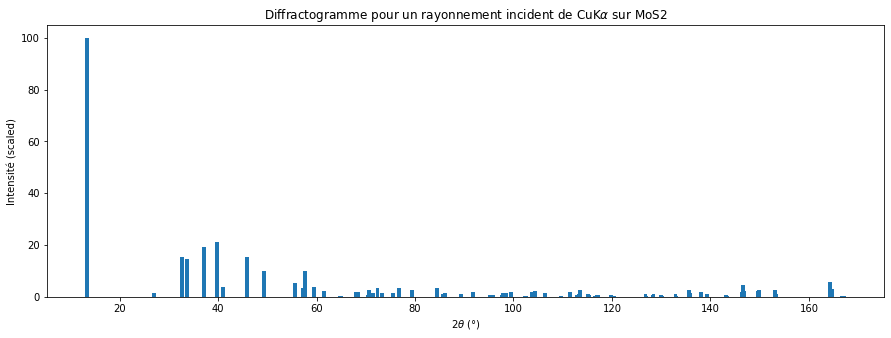

In [3]:
H = XRDCalculator().get_pattern(structure, scaled=True, two_theta_range=None)
plt.figure(figsize=(15,5))
plt.bar(H.x,H.y)
plt.xlabel(r"2$\theta$ (°)")
plt.ylabel(r"Intensité (scaled)")
plt.title(r"Diffractogramme pour un rayonnement incident de CuK$\alpha$ sur MoS2")
plt.show()

## Premier pic

In [4]:
H = XRDCalculator('CuKa').get_pattern(structure, scaled=False, two_theta_range=None)
D=XRDCalculator().get_pattern(structure, scaled=True, two_theta_range=None)
print("angle 2\u03B8(\u00b0) :",H.x[0])
print("Intensité réelle : ", H.y[0])
print("Intensité obtenue sur le graphe (réduite à l'échelle): ", D.y[0])
print("Indices de Miller  : ", H.hkls[0])
print("Distance interplanaire  : ",  H.d_hkls[0])

angle 2θ(°) : 13.408525283429551
Intensité réelle :  2052027.5735501992
Intensité obtenue sur le graphe (réduite à l'échelle):  100.0
Indices de Miller  :  [{'hkl': (0, 0, 1), 'multiplicity': 2}]
Distance interplanaire  :  6.603473132504687


## Deuxième pic

In [5]:
H = XRDCalculator('CuKa').get_pattern(structure, scaled=False, two_theta_range=None)
D=XRDCalculator().get_pattern(structure, scaled=True, two_theta_range=None)
print("angle 2\u03B8(\u00b0) :",H.x[2])
print("Intensité réelle: ", H.y[2])
print("Intensité obtenue sur le graphe (réduite à l'échelle): ", D.y[2])
print("Indices de Miller  : ", H.hkls[2])
print("Distance interplanaire : ",  H.d_hkls[2])

angle 2θ(°) : 32.6935060651101
Intensité réelle:  318465.9830309268
Intensité obtenue sur le graphe (réduite à l'échelle):  15.51957620530171
Indices de Miller  :  [{'hkl': (1, 1, 0), 'multiplicity': 2}, {'hkl': (1, -1, 1), 'multiplicity': 2}]
Distance interplanaire :  2.7391029221480423


## Troisième pic 
Ce pic ayant une très grande proximité avec le pic précédent (du fait des valeurs proches de 2θ) et ayant une intensité inférieure, il n'est donc pas visible sur le graphe. 

In [6]:
H = XRDCalculator('CuKa').get_pattern(structure, scaled=False, two_theta_range=None)
D=XRDCalculator().get_pattern(structure, scaled=True, two_theta_range=None)
print("angle 2\u03B8(\u00b0) :",H.x[3])
print("Intensité réelle : ", H.y[3])
print("Intensité obtenue sur le graphe (réduite à l'échelle): : ", D.y[3])
print("Indices de Miller  : ", H.hkls[3])
print("Distance interplanaire : ",  H.d_hkls[3])

angle 2θ(°) : 32.69768352304585
Intensité réelle :  159336.0147029988
Intensité obtenue sur le graphe (réduite à l'échelle): :  7.764808658361867
Indices de Miller  :  [{'hkl': (0, 2, 0), 'multiplicity': 2}]
Distance interplanaire :  2.7387625218710174


Les 3 premiers pics significatifs du diffractogramme avec leur indices de miller associés. Le 2ème et 3ème pics étant confondus car leurs valeurs de 2θ sont proches.


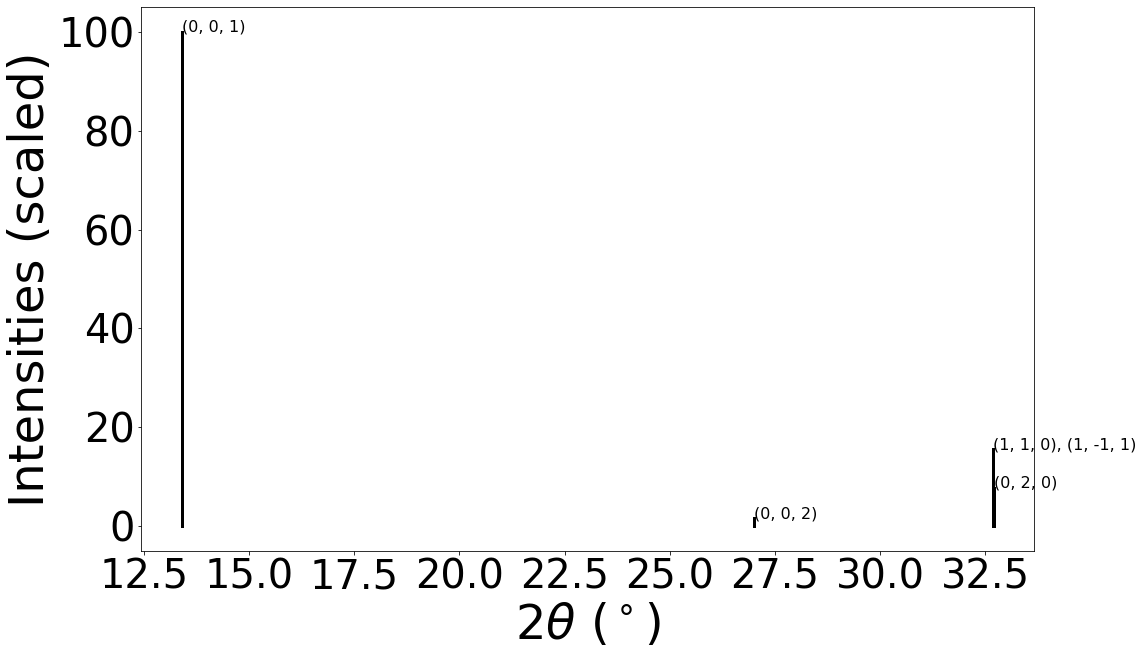

In [7]:
print("Les 3 premiers pics significatifs du diffractogramme avec leur indices de miller associés. Le 2ème et 3ème pics étant confondus car leurs valeurs de 2θ sont proches.")
x= XRDCalculator()
x.show_plot(structure,two_theta_range=(10,33),annotate_peaks=True,ax=None,with_labels=True)


## Sources
[1] « Materials Project » [online] : https://materialsproject.org/.

[2] «pymatgen.analysis.diffraction.xrd module »[online] :https://pymatgen.org/pymatgen.analysis.diffraction.xrd.html